### Mid-bootcamp-project Charlotte Stiller - Classification Algorithm

The goal of this project is to analyse the characteristics of bank customers and to train a model to predict if a bank customer will accept or reject a credit card offer.

* **1. Import libaries**
* **2. Load the data**
* **3. Data analysis on SQL**
* **4. Explore and clean the data**
 * 4.1. Clean header names and check datatype 
 * 4.2. Check basic statistics and the unique values
 * 4.3. Drop duplicates and check null values
 * 4.4.  Explore numerical data  
 * 4.5. Explore categorical columns
 * 4.6. Relationshop between accepted offers and the other columns 
* **5. EDA**
 * 5.1. Set index 
 * 5.2. Check the correlation
 * 5.3. Check value counts
* **6. Data processing, feature engineering**
 * 6.1. Apply boxcox transformation
 * 6.2. Remove outliers
* **7. Train/test split, standardize numerical + encode categorical**
* **8. Model evaluation**
 * 8.1. KNeighbors Classifier 
 * 8.2. KNeighbors Classifier with SMOTE
 * 8.3. Logistic Regression
 * 8.4. Logistic Regression - Weights 
* **9. Overview about the model results + conclusion**

### 1. Import libaries

In [90]:
from helper_v1 import *
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### 2. Load the data

In [60]:
data = pd.read_csv('creditcardmarketing.csv')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


### 3. Data analysis on SQL  

Please refer to **Solutions SQL- Classification.ipynb**

### 4. Explore and clean the data

**4.1. Clean header names and check datatypes**
- Renaming the columns so they follow the PE8 (snake case) and taking out non alphanumeric (#)
- My get_started function clean the column names and give the data types of the columns, shape of the dataframe

In [61]:
get_started(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

#### 4.2. Check basic statistics and the unique values

In [62]:
data.describe().apply(lambda x: round(x,2))

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.00,18000.00,18000.0,18000.00,18000.00,17976.00,17976.00,17976.00,17976.00,17976.00
mean,9000.50,1.26,1.9,1.20,3.50,940.52,910.45,999.39,1042.03,810.19
std,5196.30,0.47,0.8,0.43,1.11,350.30,620.08,457.40,553.45,559.00
min,1.00,1.00,1.0,1.00,1.00,48.25,0.00,0.00,0.00,0.00
25%,4500.75,1.00,1.0,1.00,3.00,787.50,392.75,663.00,633.00,363.00
50%,9000.50,1.00,2.0,1.00,3.00,1007.00,772.00,1032.00,945.50,703.00
75%,13500.25,1.00,2.0,1.00,4.00,1153.25,1521.00,1342.00,1463.00,1212.00
max,18000.00,3.00,4.0,3.00,9.00,3366.25,3450.00,3421.00,3823.00,4215.00


In [63]:
unique_val(data.drop(['customer_number', 'average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'], axis=1))


offer_accepted
['No' 'Yes'] 


reward
['Air Miles' 'Cash Back' 'Points'] 


mailer_type
['Letter' 'Postcard'] 


income_level
['High' 'Medium' 'Low'] 


bank_accounts_open
[1 2 3] 


overdraft_protection
['No' 'Yes'] 


credit_rating
['High' 'Medium' 'Low'] 


credit_cards_held
[2 1 3 4] 


homes_owned
[1 2 3] 


household_size
[4 5 2 6 3 1 8 9] 


own_your_home
['No' 'Yes'] 



#### 4.3. Drop duplicates and check null values
No duplicates in the dataset.

In [64]:
data = data.drop_duplicates()
data.shape

(18000, 17)

Checking the NaN values shows five columns with the same amount of NaN values (0.13 %, 24 Values from 18.000 rows). Let's replace the null value with the mean. 

In [65]:
percantage_null(data)

                      percentage
q4_balance              0.133333
q3_balance              0.133333
q2_balance              0.133333
q1_balance              0.133333
average_balance         0.133333
homes_owned             0.000000
own_your_home           0.000000
household_size          0.000000
customer_number         0.000000
offer_accepted          0.000000
credit_rating           0.000000
overdraft_protection    0.000000
bank_accounts_open      0.000000
income_level            0.000000
mailer_type             0.000000
reward                  0.000000
credit_cards_held       0.000000


In [66]:
replace_by_mean(data, columns = ['q4_balance', 'q3_balance', 'q2_balance', 'q1_balance', 'average_balance' ])

In [67]:
data.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

#### 4.4. Explore numerical data 

In [68]:
num = data.select_dtypes(include=np.number)
num.head()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


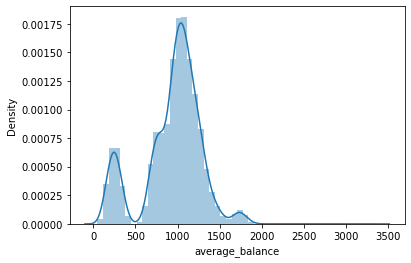

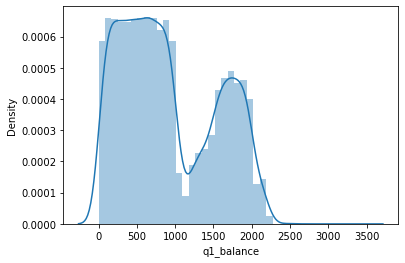

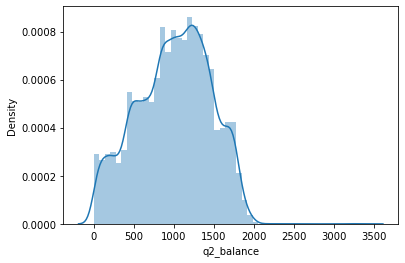

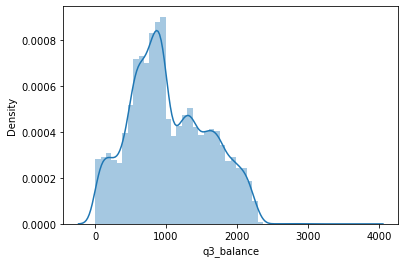

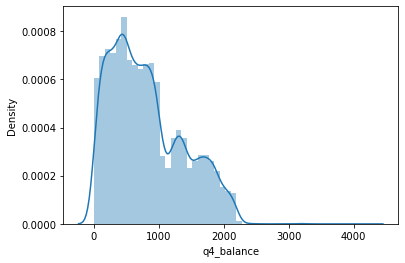

In [69]:
for column in num.drop(['customer_number', 'bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size'], axis=1):
    sns.distplot(num[column])
    plt.show()

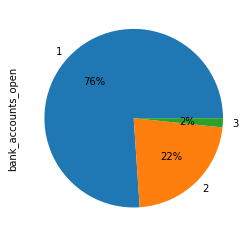

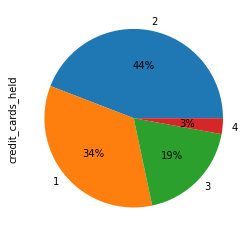

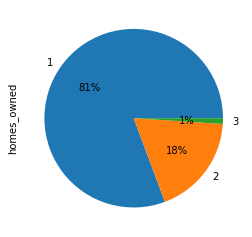

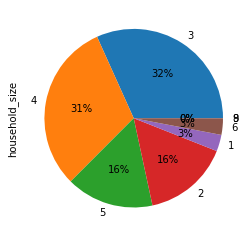

In [70]:
columns = ['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size']
for col in columns:
    data[col].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4, 10))
    plt.show()

**Findings in numerical columns**
- Only 3% of the customer hold more than three credit cards. Therefore, I would recommend to offer a credit card only to customers who only have one or two credit cards yet. 
- 19% of the customers own more than one home (if they are a homeowner at all). 
- Only 24% have more than one open bank account.
- Most of the customers live in a household with other people. Only 3% live alone. 

#### 4.5. Explore categorical columns

In [71]:
cat = data.select_dtypes(np.object)
cat.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes


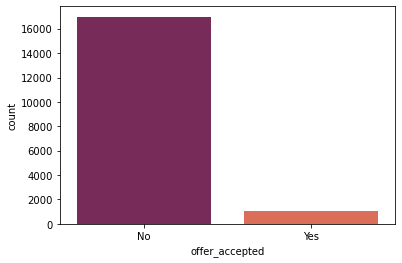

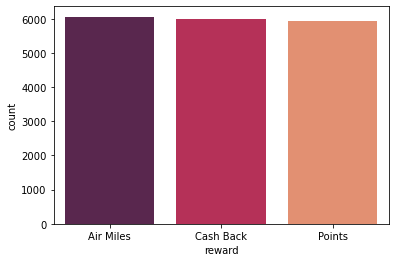

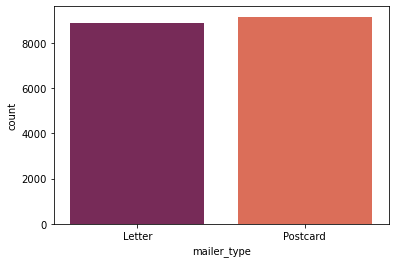

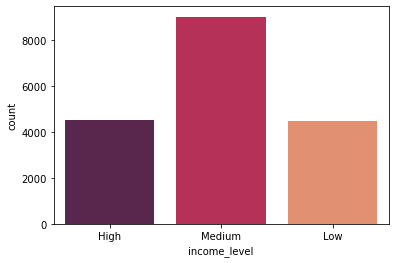

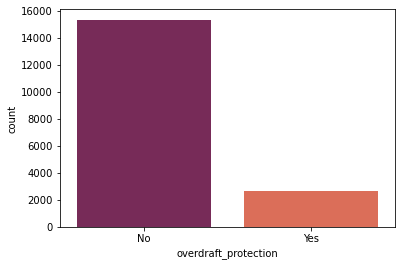

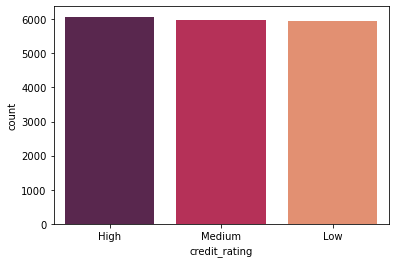

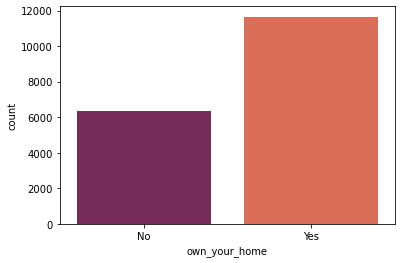

In [72]:
for column in cat.columns: 
    sns.countplot(cat[column], palette = 'rocket')
    plt.show()

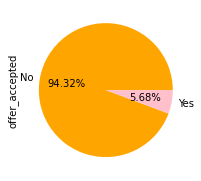

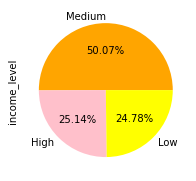

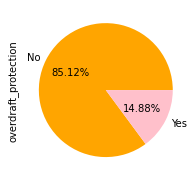

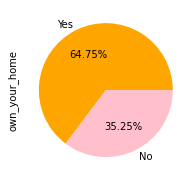

In [73]:
columns = ['offer_accepted', 'income_level', 'overdraft_protection', 'own_your_home']
for col in columns:
    data[col].value_counts().plot(kind='pie', autopct = "%.2f%%", colors = ['orange', 'pink', 'yellow'], figsize=(3, 6))
    plt.show()

**Findings in categorical columns**
- Only 5,68% of the customers accepted an offer. 
- 64,75% of the customer own their home.
- About 85,12% have an overdraft protection on their checking account(s).

#### 4.6. Relationshop between accepted offers and the other columns 

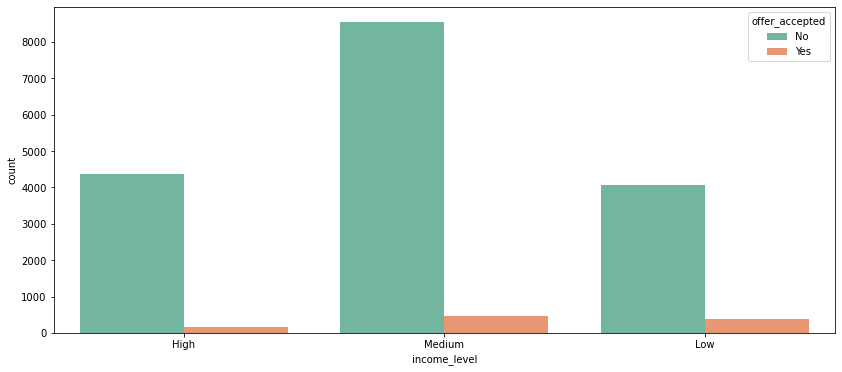

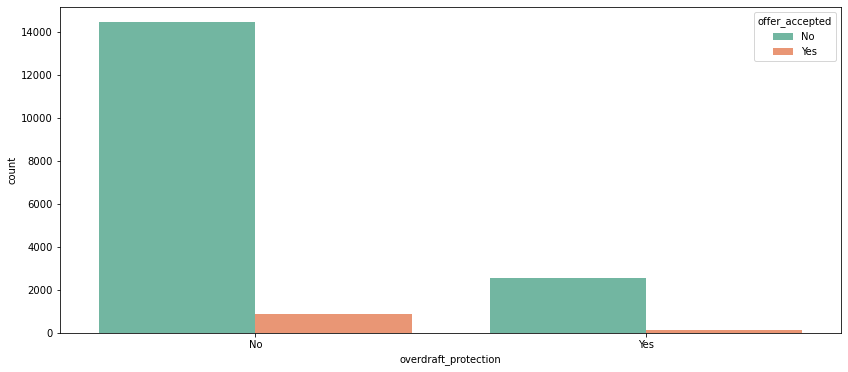

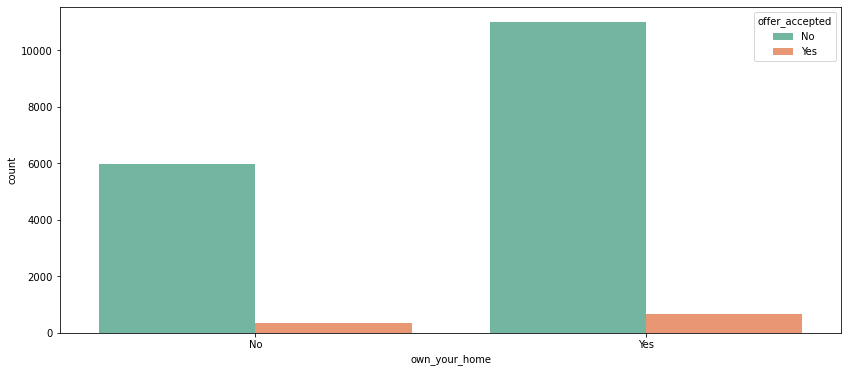

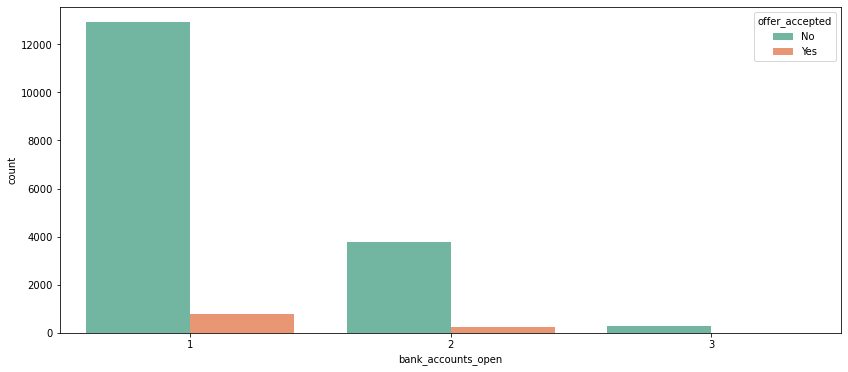

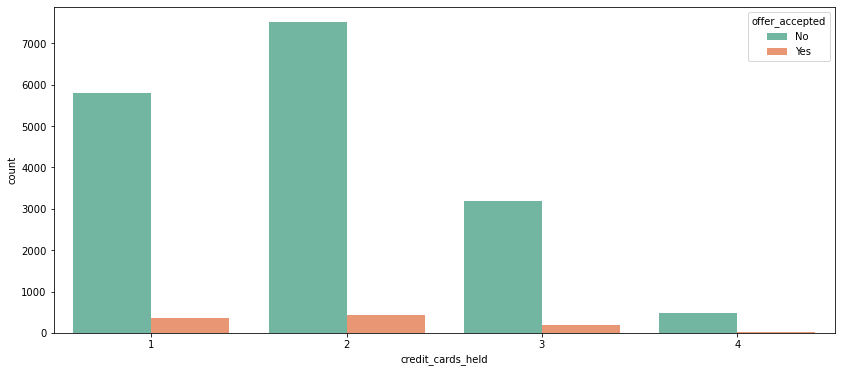

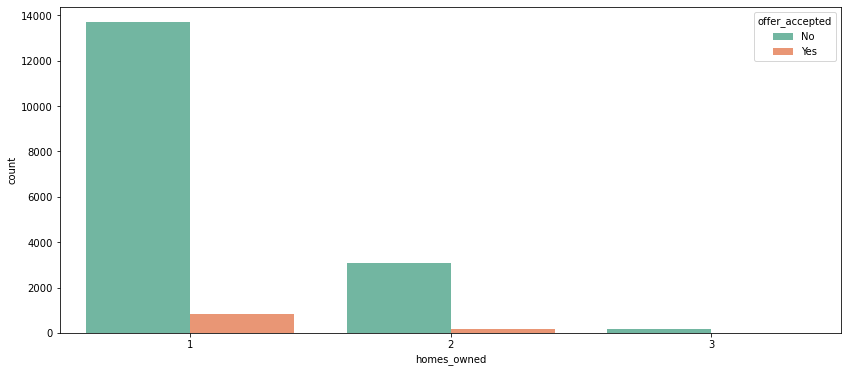

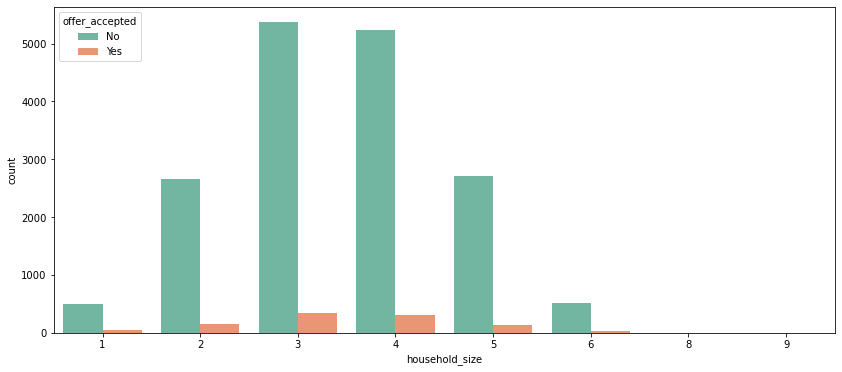

In [74]:
columns = ['income_level', 'overdraft_protection', 'own_your_home', 'bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size']
for i in columns: 
    plt.figure(figsize=(14,6))
    sns.countplot(x = i, hue = 'offer_accepted', data = data, palette = "Set2")
    plt.show()

**Findings in the relations between the columns**
- The distribution of customers who accepted the offer appears to be evenly divided between levels of income. Same for the option to have an overdraft protection, owning a home, the amount of open bank accounts, credit cards held and amount of home. 
- My only guess, based on the first overview, is that people who live in a household of the size 3 or 4 are more likely to accept the offer. 

### 5. EDA

#### 5.1. Set index

Because the customer_number is a unique value, I set it to index.

In [75]:
data.set_index('customer_number',inplace = True)
data.shape

(18000, 16)

#### 5.2. Check the correlation

Check the correlation for numerical data

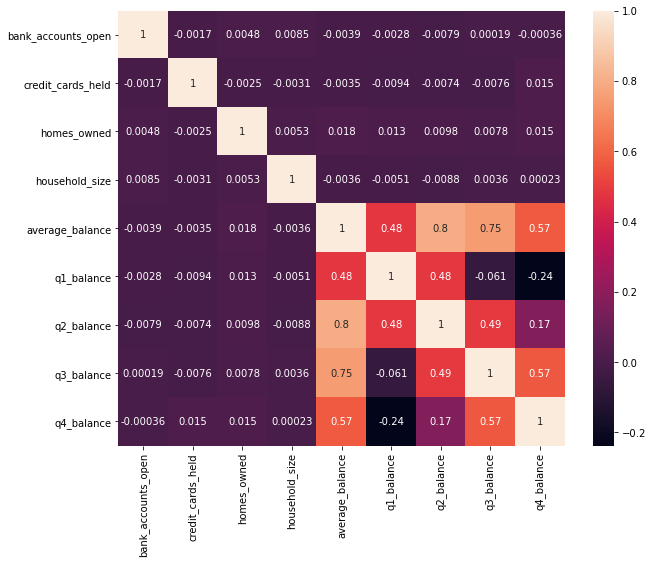

In [76]:
corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

There is a high correlation between the over all average and the average of the quarterly average (q1, q2, q3, q4.) Hence, I decided to drop the average balance.  

In [77]:
data = data.drop(['average_balance'],axis=1)

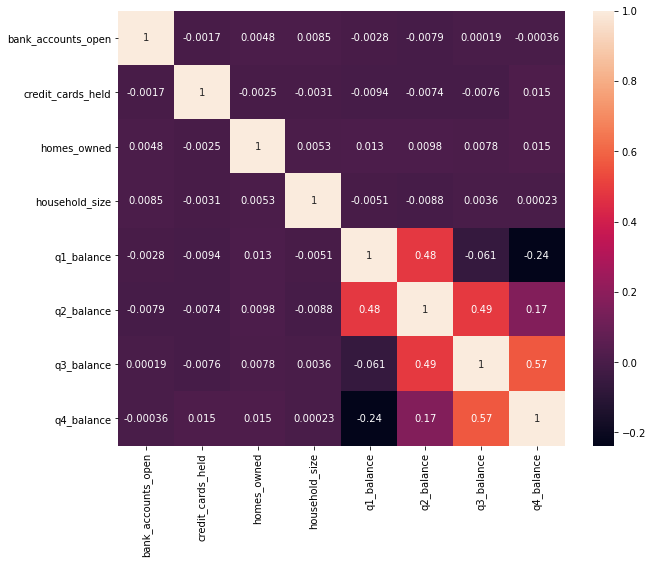

In [78]:
corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Check the correlation for categorical data

In [91]:
chi_square_execute(data, columns= data.select_dtypes(np.object))


--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
H₀: column offer_accepted  and column reward are independent, i.e. no relationship
H₁: column offer_accepted  and column reward are independent, i.e. ∃ a relationship
α = 0.05

--------------------------------------------------------------------------------------
The p-value approach: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 101.99764699462307  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
The critical value approach: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 101.99764699462307  and p value is: 5.991464547107979
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------

-----


--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
H₀: column reward  and column credit_rating are independent, i.e. no relationship
H₁: column reward  and column credit_rating are independent, i.e. ∃ a relationship
α = 0.05

--------------------------------------------------------------------------------------
The p-value approach: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2.316082014017522  and p value is: 0.9539012400734888
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
The critical value approach: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 2.316082014017522  and p value is: 9.487729036781154
Failed to reject the null hypothesis.

----------------------------------------------------------------

chisquare-score is: 2.5939477679734813  and p value is: 9.487729036781154
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
H₀: column income_level  and column mailer_type are independent, i.e. no relationship
H₁: column income_level  and column mailer_type are independent, i.e. ∃ a relationship
α = 0.05

--------------------------------------------------------------------------------------
The p-value approach: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1.0904891434307842  and p value is: 0.8184597351294058
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
The critical value approach: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1.0904891434307842  and p value is:


--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
H₀: column credit_rating  and column offer_accepted are independent, i.e. no relationship
H₁: column credit_rating  and column offer_accepted are independent, i.e. ∃ a relationship
α = 0.05

--------------------------------------------------------------------------------------
The p-value approach: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 443.1289291631658  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
The critical value approach: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 443.1289291631658  and p value is: 5.991464547107979
Null Hypothesis is rejected.

---------------------------------------------------------------------------------


--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
H₀: column own_your_home  and column overdraft_protection are independent, i.e. no relationship
H₁: column own_your_home  and column overdraft_protection are independent, i.e. ∃ a relationship
α = 0.05

--------------------------------------------------------------------------------------
The p-value approach: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1.20075350362184  and p value is: 0.4204456607035978
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
The critical value approach: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1.20075350362184  and p value is: 3.841458820694124
Failed to reject the null hypothesis.

--------------------------------------

**Conclusion**

There is a relationship between the following columns (reject the null hypothesis): 

offer_accepted  and column credit_rating 
offer_accepted  and column income_level 
offer_accepted  and column mailer_type 
offer_accepted  and column reward

In the other combination is no relationship between the columns (Failed to reject the null hypothesis). 

- To fit the model there is the possibility to drop the columns ('overdraft_protection', 'own_your_home')  without a relationship to the target variable "offer accepted" 
- For the next marketing study I would recommend to change the questions which have no relationship to the target variable "offer accepted". 

#### 5.3. Check value counts

In [117]:
value_counts(data)

No     16977
Yes     1023
Name: offer_accepted, dtype: int64 

Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64 

Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64 

Medium    9013
High      4526
Low       4461
Name: income_level, dtype: int64 

1    13692
2     4012
3      296
Name: bank_accounts_open, dtype: int64 

No     15322
Yes     2678
Name: overdraft_protection, dtype: int64 

High      6071
Medium    5972
Low       5957
Name: credit_rating, dtype: int64 

2    7944
1    6154
3    3387
4     515
Name: credit_cards_held, dtype: int64 

1    14523
2     3292
3      185
Name: homes_owned, dtype: int64 

3    5712
4    5543
5    2853
2    2813
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64 

Yes    11655
No      6345
Name: own_your_home, dtype: int64 

910.450656     24
675.000000     23
81.000000      23
823.000000     22
676.000000     22
               ..
1114.000000     1
2062.000000     1
2068.000000 

There are only two entries for customers with a household size bigger than 6, so I decided to assign the value 6 to these two entries as well, in order to make the data more balanced. 

In [118]:
data['household_size'] = data['household_size'].apply(lambda x: x if x < 7 else 6)

data['household_size'].value_counts()

3    5712
4    5543
5    2853
2    2813
6     540
1     539
Name: household_size, dtype: int64

### 6.  Data processing, feature engineering

In [119]:
df1 = data
df1.shape

(18000, 15)

#### 6.1. Apply boxcox transformation

In [120]:
df1, _ci = boxcox_transform(df1)
df1

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,0.000000,No,High,0.733744,0.000000,2.831341,No,74.088196,641.948172,174.455505,50.666453
2,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.142198,3.733432,Yes,10.171719,86.052504,27.370949,30.993842
3,No,Air Miles,Postcard,High,0.185052,No,Medium,0.733744,0.000000,0.973935,Yes,34.365591,270.063072,42.616073,25.219542
4,No,Air Miles,Letter,Medium,0.185052,No,High,0.000000,0.000000,2.831341,No,72.037644,1241.725907,177.086014,33.134063
5,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.000000,4.623143,Yes,83.885335,970.704172,161.815636,30.951910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,No,Cash Back,Letter,High,0.000000,No,Low,0.000000,0.000000,3.733432,Yes,20.406124,53.788326,25.573506,32.304514
17997,No,Cash Back,Letter,High,0.000000,No,Low,1.202918,0.000000,1.913470,Yes,56.816308,685.562516,157.348155,37.358270
17998,No,Cash Back,Letter,High,0.000000,No,Low,0.733744,0.000000,2.831341,No,54.859399,565.381288,182.617563,61.387229


#### 6.2. Remove outliers 

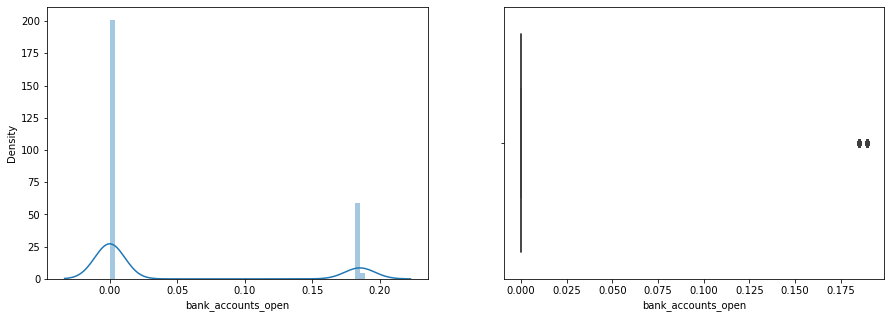

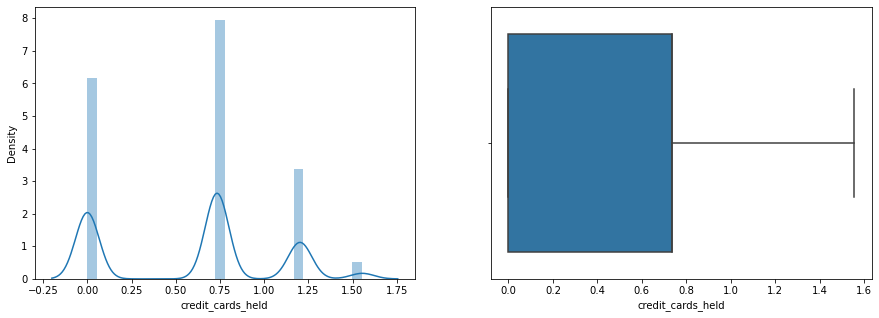

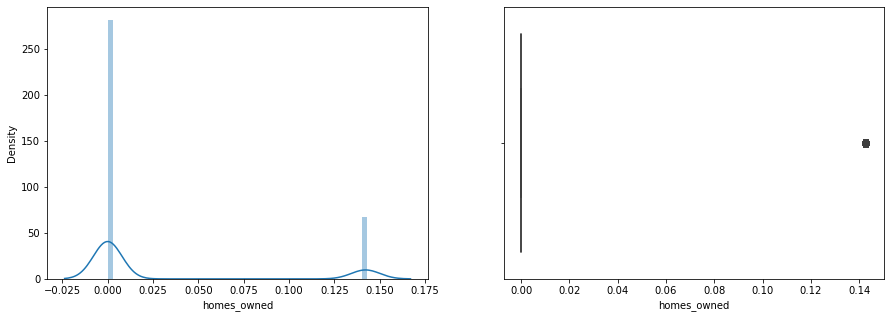

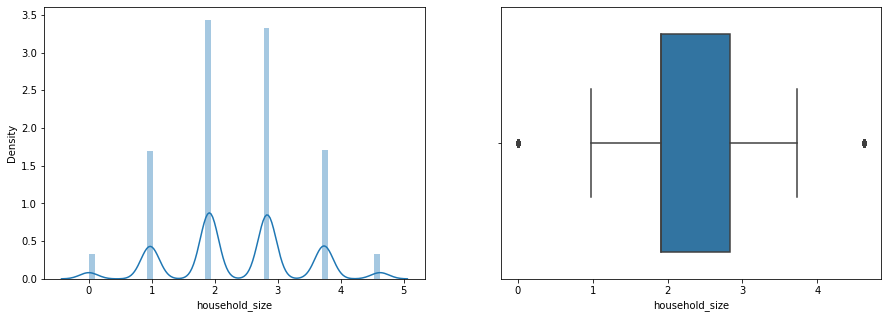

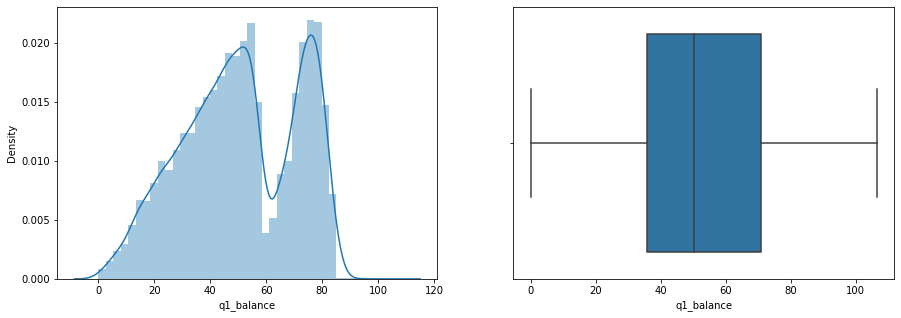

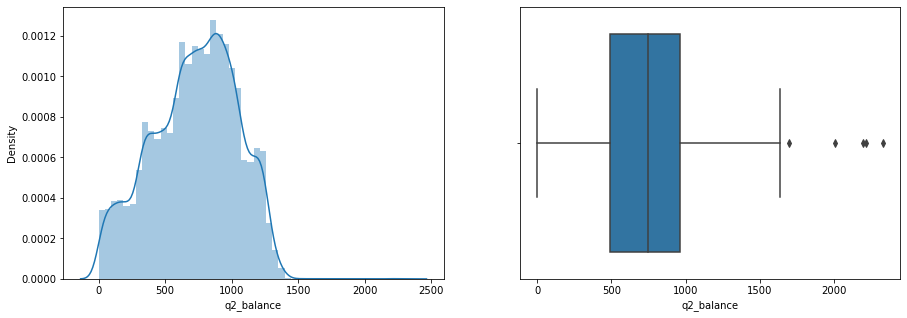

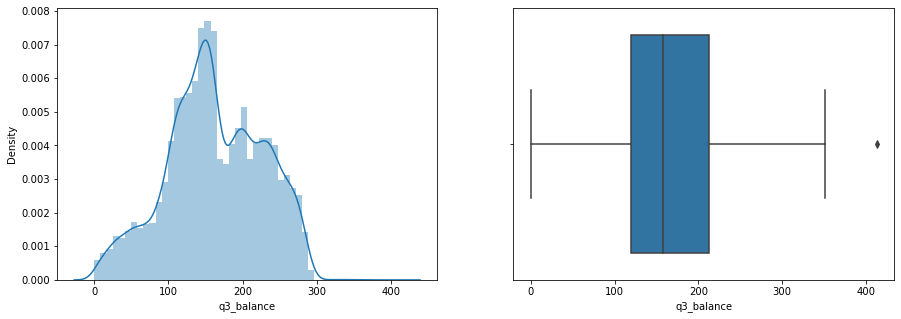

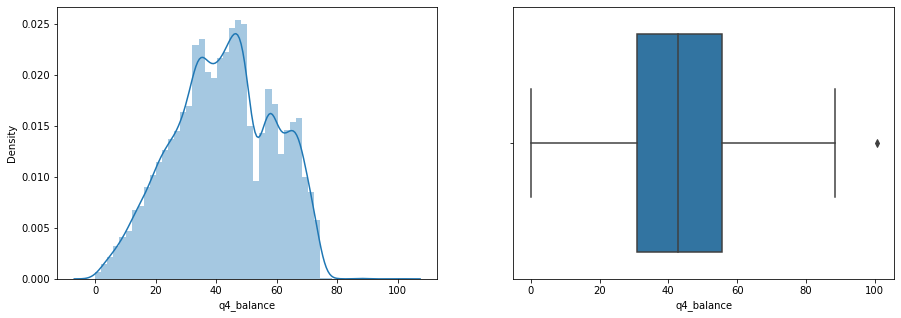

In [121]:
for col in df1.select_dtypes(np.number):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(data[col], ax=axes[0])
    sns.boxplot(data[col], ax=axes[1])
    plt.show()

I removed only the outliers of the columns 'q2_balance', 'q3_balance', 'q4_balance' because these are the columns with a higher number of outliers.

In [122]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [123]:
df2 = remove_outliers(df1, threshold=1.5, in_columns= ['q2_balance', 'q3_balance', 'q4_balance'])
df2.shape

(17995, 15)

### 7. Train/test split, standardize numerical + encode categorical

In [124]:
X = df2.drop('offer_accepted', axis =1)
y = df2['offer_accepted']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7.1. standardize numerical

In [126]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [127]:
transformer = StandardScaler().fit(X_train_num)
X_train_n = transformer.transform(X_train_num)

In [128]:
transformer = StandardScaler().fit(X_test_num)
X_test_n = transformer.transform(X_test_num)

In [129]:
X_train_n.shape, X_test_n.shape

((14396, 8), (3599, 8))

7.2. encode categorical

In [130]:
X_train_cat = X_train.select_dtypes(exclude=np.number)
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
encoded_train = encoder.transform(X_train_cat).toarray()

In [131]:
X_test_cat = X_test.select_dtypes(exclude=np.number)
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_test_cat)
encoded_test = encoder.transform(X_test_cat).toarray()

7.3. concatenate standardize numerical and encode categorical

In [132]:
X_train = np.concatenate((X_train_n, encoded_train), axis=1)

In [133]:
X_test = np.concatenate((X_test_n, encoded_test), axis=1)

In [134]:
X_train.shape, X_test.shape

((14396, 17), (3599, 17))

### 8. Model evaluation

#### 8.1. KNeighbors Classifier

Choose the best k value

In [135]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.8983050847457628,
 0.9380383439844401,
 0.9433175882189497,
 0.9449847179772158,
 0.945540427896638,
 0.945540427896638,
 0.945540427896638,
 0.945540427896638,
 0.945540427896638,
 0.945540427896638]

Text(0, 0.5, 'Accuracy')

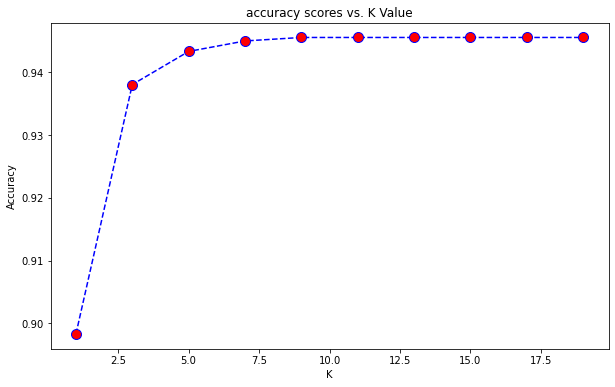

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [137]:
def using_KNNClassifier(y_train,X_train,y_test,X_test,n):
    
    classification = KNeighborsClassifier(n_neighbors=n)
    classification.fit(X_train, y_train)
    predictions = classification.predict(X_test)
    score = classification.score(X_test, y_test)
    print("accuracy score:", score)
    y_pred = model.predict(X_test)
    predictions = classification.predict(X_test)
    print(confusion_matrix(y_test, predictions))
    
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True No', 'False No',
                   'False Yes', 'True Yes',]

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

**KNeighbors Classifier k = 5** 

accuracy score: 0.9433175882189497
[[3392   11]
 [ 193    3]]


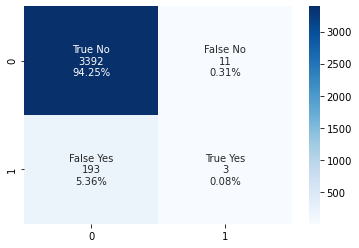

In [138]:
using_KNNClassifier(y_train,X_train,y_test,X_test,5)

In [139]:
report_KNN_5 = classification_report(y_test, y_pred)
print(report_KNN_5)

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      3403
         Yes       0.00      0.00      0.00       196

    accuracy                           0.95      3599
   macro avg       0.47      0.50      0.49      3599
weighted avg       0.89      0.95      0.92      3599



#### 8.2. KNeighbors Classifier with SMOTE

In [140]:
print(round(df2['offer_accepted'].value_counts()/len(df2), 2))

No     0.94
Yes    0.06
Name: offer_accepted, dtype: float64


In [141]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

No     13569
Yes    13569
Name: offer_accepted, dtype: int64

Choose the best k value

In [142]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.8463462072797999,
 0.7885523756599055,
 0.7493748263406502,
 0.7088080022228397,
 0.6782439566546263,
 0.6512920255626563,
 0.6296193387051959,
 0.6143373159210892,
 0.5996110030564046,
 0.5821061405946096]

Text(0, 0.5, 'Accuracy')

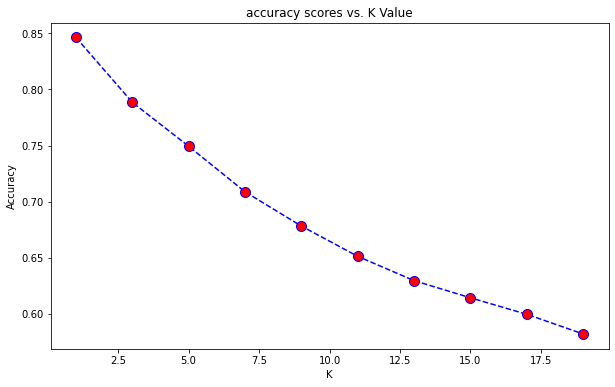

In [143]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

**KNeighbors Classifier with SMOTE k = 2** 

In [144]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_sm, y_sm)

KNeighborsClassifier(n_neighbors=2)

In [145]:
y_pred = model.predict(X_test)
print("accuracy_score k=2:", metrics.accuracy_score(y_test, y_pred))

accuracy_score k=2: 0.8607946651847735


[[3064  339]
 [ 162   34]]


<AxesSubplot:>

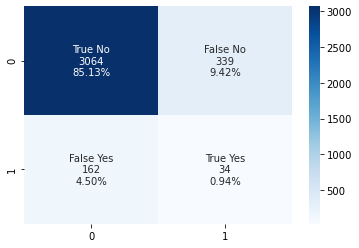

In [146]:
print(confusion_matrix(y_test, y_pred))
    
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True No', 'False No',
                   'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [147]:
report_KNN_SMOTE_2 = classification_report(y_test, y_pred)
print(report_KNN_SMOTE_2)

              precision    recall  f1-score   support

          No       0.95      0.90      0.92      3403
         Yes       0.09      0.17      0.12       196

    accuracy                           0.86      3599
   macro avg       0.52      0.54      0.52      3599
weighted avg       0.90      0.86      0.88      3599



**KNeighbors Classifier with SMOTE k = 5** 

In [148]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_sm, y_sm)

KNeighborsClassifier()

In [149]:
y_pred = model.predict(X_test)
print("accuracy_score k=5:", metrics.accuracy_score(y_test, y_pred))

accuracy_score k=5: 0.7493748263406502


[[2620  783]
 [ 119   77]]


<AxesSubplot:>

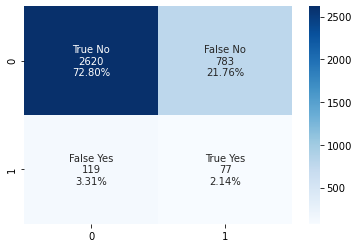

In [150]:
print(confusion_matrix(y_test, y_pred))
    
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True No', 'False No',
                   'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [151]:
report_KNN_SMOTE_5 = classification_report(y_test, y_pred)
print(report_KNN_SMOTE_5)

              precision    recall  f1-score   support

          No       0.96      0.77      0.85      3403
         Yes       0.09      0.39      0.15       196

    accuracy                           0.75      3599
   macro avg       0.52      0.58      0.50      3599
weighted avg       0.91      0.75      0.81      3599



Findings
- The highest KNN accuracy score (0.93) is given without SMOTE and a k = 5 
- The confusion matrix of the KNN without SMOTE shows that the highest accuracy score gives only 1 True Yes 
- The technique SMOTE is not the right choice for this dataset


In [ ]:
# conclusion 

#### 8.3. Logistic Regression

In [152]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [153]:
classification.score(X_test, y_test)

0.945540427896638

In [154]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[3403,    0],
       [ 196,    0]], dtype=int64)

<AxesSubplot:>

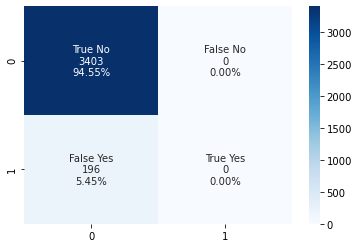

In [155]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [156]:
report_lr = classification_report(y_test, y_pred)
print(report_lr)

              precision    recall  f1-score   support

          No       0.96      0.77      0.85      3403
         Yes       0.09      0.39      0.15       196

    accuracy                           0.75      3599
   macro avg       0.52      0.58      0.50      3599
weighted avg       0.91      0.75      0.81      3599



Good prediction when it comes to the True No, but the bad prediction for True Yes makes this approach useless for the given dataset. 

#### 8.4. Logistic Regression - Weights

Balance the data to get an better prediction when it comes to True Yes. I take a sample size of 9.000. Downsample No and upsample Yes. 

In [157]:
total = sum(df2['offer_accepted'].value_counts())
total

17995

In [158]:
weights = {'No': total/(2*df2['offer_accepted'].value_counts()['No']),
           'Yes': total/(2*df2['offer_accepted'].value_counts()['Yes'])}
weights

{'No': 0.5301378741456516, 'Yes': 8.795210166177908}

**Train/test split**

In [159]:
y = df2['offer_accepted']
X = df2.drop('offer_accepted', axis=1)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**standardize numerical**

In [161]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [162]:
transformer = StandardScaler().fit(X_train_num)
X_train_n = transformer.transform(X_train_num)

In [163]:
transformer = StandardScaler().fit(X_test_num)
X_test_n = transformer.transform(X_test_num)

In [164]:
X_train_n.shape, X_test_n.shape

((14396, 8), (3599, 8))

**encode categorical**

In [165]:
X_train_cat = X_train.select_dtypes(exclude=np.number)

In [166]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
encoded_train = encoder.transform(X_train_cat).toarray()

In [167]:
X_test_cat = X_test.select_dtypes(exclude=np.number)

In [168]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_test_cat)
encoded_test = encoder.transform(X_test_cat).toarray()

**concatenate standardize numerical and encode categorical**

In [169]:
X_train = np.concatenate((X_train_n, encoded_train), axis=1)

In [170]:
X_test = np.concatenate((X_test_n, encoded_test), axis=1)

In [171]:
X_train.shape, X_test.shape

((14396, 17), (3599, 17))

**Fit the model with new sample size**

In [172]:
classification = LogisticRegression(random_state=42, max_iter=10000, class_weight=weights)
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.6693525979438733

In [173]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[2273, 1130],
       [  60,  136]], dtype=int64)

<AxesSubplot:>

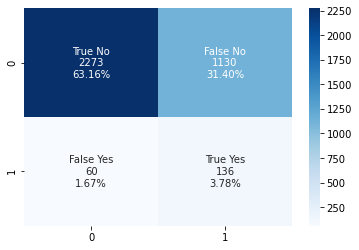

In [174]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [175]:
report_weights = classification_report(y_test, predictions)
print(report_weights)

              precision    recall  f1-score   support

          No       0.97      0.67      0.79      3403
         Yes       0.11      0.69      0.19       196

    accuracy                           0.67      3599
   macro avg       0.54      0.68      0.49      3599
weighted avg       0.93      0.67      0.76      3599



Even if the accuracy score of 0.66 is not as high, the prediction is better. With the weight balanced data the True Yes works much better, but there are more False No. About 70% of the "No" is predicted True and 75% of the "Yes" is predicted True. 

### 9. Overview about the model results + conclusion

**8.1. KNeighbors Classifier**

In [80]:
print(report_KNN_5)

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      3403
         Yes       0.00      0.00      0.00       196

    accuracy                           0.95      3599
   macro avg       0.47      0.50      0.49      3599
weighted avg       0.89      0.95      0.92      3599



**8.2. KNeighbors Classifier SMOTE**

In [81]:
print(report_KNN_SMOTE_2)

              precision    recall  f1-score   support

          No       0.95      0.90      0.92      3403
         Yes       0.08      0.16      0.11       196

    accuracy                           0.86      3599
   macro avg       0.52      0.53      0.52      3599
weighted avg       0.90      0.86      0.88      3599



In [82]:
print(report_KNN_SMOTE_5)

              precision    recall  f1-score   support

          No       0.95      0.76      0.85      3403
         Yes       0.08      0.37      0.14       196

    accuracy                           0.74      3599
   macro avg       0.52      0.57      0.49      3599
weighted avg       0.91      0.74      0.81      3599



**8.3. Logistic regression**

In [83]:
print(report_lr)

              precision    recall  f1-score   support

          No       0.95      0.76      0.85      3403
         Yes       0.08      0.37      0.14       196

    accuracy                           0.74      3599
   macro avg       0.52      0.57      0.49      3599
weighted avg       0.91      0.74      0.81      3599



**8.4. Logistic Regression - Weights**

In [84]:
print(report_weights)

              precision    recall  f1-score   support

          No       0.97      0.67      0.79      3403
         Yes       0.11      0.69      0.19       196

    accuracy                           0.67      3599
   macro avg       0.54      0.68      0.49      3599
weighted avg       0.93      0.67      0.76      3599



#### 10. Conclusions

- For the next marketing study I would recommend to change the questions which have no relationship to the target variable "offer accepted". (5.2.) and to build bins (house hold size 5-9) 